# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE 
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegressionCV

# Loading dataset

In [2]:
airline = pd.read_csv('Tweets.csv')

In [3]:
airline[airline['retweet_count']>0]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
136,569625739231948800,positive,1.0,NaN,NaN,Virgin America,NaN,lisaptv,NaN,1,@virginamerica you ROCK for making it so I can...,NaN,2015-02-22 14:32:14 -0800,NaN,Mountain Time (US & Canada)
147,569599867716132864,positive,1.0,NaN,NaN,Virgin America,NaN,jessicajaymes,NaN,2,Always have it together!!! You're welcome! RT ...,"[33.94652852, -118.40766257]",2015-02-22 12:49:25 -0800,"hollywood, california",Pacific Time (US & Canada)
264,568929979981033472,positive,1.0,NaN,NaN,Virgin America,NaN,djchuang,NaN,1,@VirginAmerica thanks for gate checking my bag...,"[32.8454782, -96.8504585]",2015-02-20 16:27:32 -0800,"Orange County, CA",Pacific Time (US & Canada)
304,568812046747201537,negative,1.0,Lost Luggage,1.0000,Virgin America,NaN,snellbell,NaN,1,@VirginAmerica lost my luggage 4 days ago on f...,NaN,2015-02-20 08:38:54 -0800,NaN,Quito
318,568735060104511488,neutral,1.0,NaN,NaN,Virgin America,NaN,gemmabow19,NaN,2,@VirginAmerica can u help this 👸 @FreyaBevan_F...,NaN,2015-02-20 03:32:59 -0800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14426,569617808885096448,negative,1.0,Customer Service Issue,1.0000,American,NaN,ejacqui,NaN,1,"@AmericanAir no one received text alerts, auto...",NaN,2015-02-22 14:00:43 -0800,Chicago,Central Time (US & Canada)
14524,569604328153083904,negative,1.0,Late Flight,0.6849,American,NaN,farazq,NaN,1,@AmericanAir can you do anything to get #AA953...,"[40.80718573, -73.95477259]",2015-02-22 13:07:09 -0800,"New York, NY",Quito
14532,569603156927246336,negative,1.0,Flight Booking Problems,0.6964,American,NaN,JasonShaw2,NaN,2,@AmericanAir missing a full days of work thank...,NaN,2015-02-22 13:02:29 -0800,Belleville,Eastern Time (US & Canada)
14547,569601094239825920,positive,1.0,NaN,NaN,American,NaN,EricRoberts,NaN,1,Eliza &amp; I cheated on u @AmericanAir with @...,NaN,2015-02-22 12:54:18 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


# 14640 rows and 15 columns

In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
airline.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

# Deleting unnecessary columns

In [6]:
airline.drop(['negativereason','negativereason_confidence','airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_location','user_timezone'],axis=1,inplace=True)

In [7]:
airline

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800
...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800
14636,569587371693355008,negative,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800
14637,569587242672398336,neutral,1.0000,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800
14638,569587188687634433,negative,1.0000,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800


In [8]:
airline.drop(['tweet_id','name','tweet_created'],axis=1,inplace=True)

In [9]:
airline[airline['text'].str.contains('👸')]

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text
318,neutral,1.0000,Virgin America,2,@VirginAmerica can u help this 👸 @FreyaBevan_F...
7892,neutral,0.6526,Delta,0,@JetBlue Get me out of this 7 degree weather.....


# Different airlines

In [10]:
airline['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:xlabel='airline', ylabel='count'>

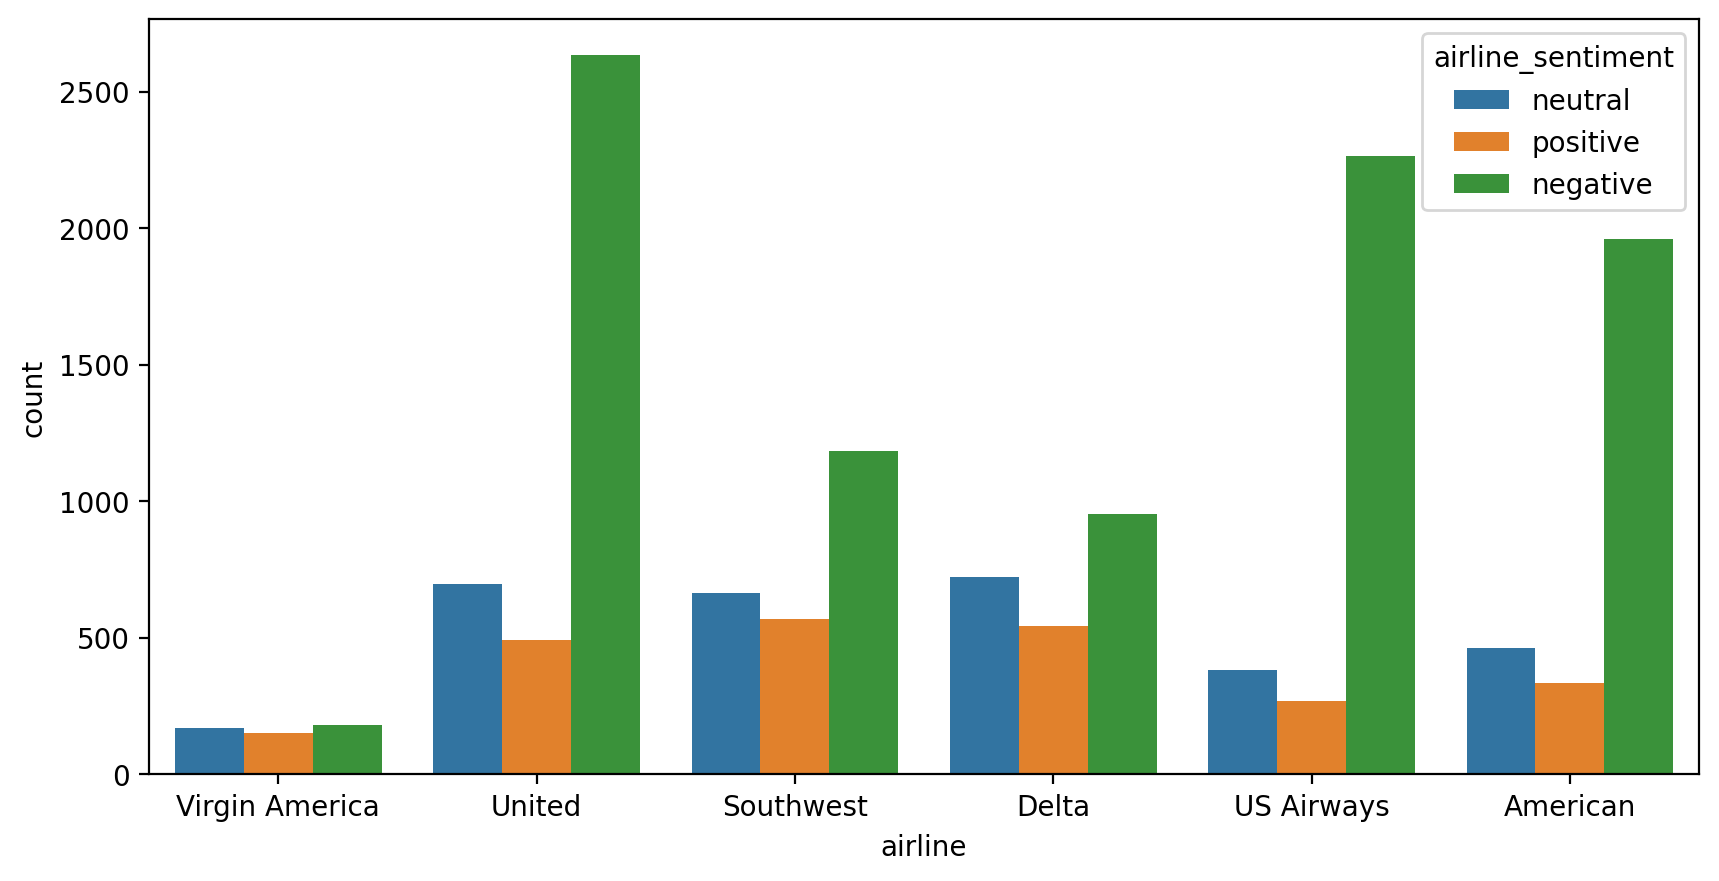

In [11]:
plt.figure(figsize=(10,5),dpi=200)
sns.countplot(x='airline',data=airline, hue='airline_sentiment')

# Data preprocessing

In [12]:
airline

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text
0,neutral,1.0000,Virgin America,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Virgin America,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Virgin America,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...
14635,positive,0.3487,American,0,@AmericanAir thank you we got on a different f...
14636,negative,1.0000,American,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,1.0000,American,0,@AmericanAir Please bring American Airlines to...
14638,negative,1.0000,American,0,"@AmericanAir you have my money, you change my ..."


In [13]:
stop = stopwords.words('english')

In [14]:
extra = ['@','VirginAmerica','united','SouthwestAir','JetBlue','USAirways','AmericanAir']

In [15]:
stop.extend(extra)

In [16]:
stop.extend(string.punctuation)

In [17]:
stop.extend(string.digits)

In [18]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
lemmatizer = WordNetLemmatizer()

In [20]:
stemmer = PorterStemmer()

In [21]:
def prep(i):
    i = i.lower()
    words = nltk.word_tokenize(i)
    words=[stemmer.stem(word) for word in words if word not in stop and (len(word)>=3) and (len(word)<=20)]
    return ' '.join(words)

In [22]:
airline['text'] = airline.text.apply(prep)

In [23]:
airline['text'][7892]

'jetblu get degre weather ... westpalmbeachbound 🌞✈️👸'

# Separating different airlines in different dataset 

In [24]:
virgin_america = airline[airline['airline'] == 'Virgin America']

In [25]:
virgin_america.drop(['airline'],axis=1,inplace=True)
virgin_america

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,airline_sentiment,airline_sentiment_confidence,retweet_count,text
0,neutral,1.0000,0,virginamerica dhepburn said
1,positive,0.3486,0,virginamerica plu 've ad commerci experi ... t...
2,neutral,0.6837,0,virginamerica n't today ... must mean need tak...
3,negative,1.0000,0,virginamerica realli aggress blast obnoxi ente...
4,negative,1.0000,0,virginamerica realli big bad thing
...,...,...,...,...
499,neutral,1.0000,0,virginamerica morn question regard elev point ...
500,neutral,0.6694,0,virginamerica still wait see starryeyes_dev_
501,neutral,0.6376,0,virginamerica wonder guy reciev 're abl potent...
502,positive,1.0000,4,virginamerica fli lax sfo look awesom movi lin...


In [26]:
united = airline[airline['airline'] == 'United']

In [27]:
united.drop(['airline'],axis=1,inplace=True)
united

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,airline_sentiment,airline_sentiment_confidence,retweet_count,text
504,positive,1.0000,0,thank
505,positive,1.0000,0,thank take care happi custom
506,negative,1.0000,0,still refund word via pleas resolv issu cancel...
507,negative,1.0000,0,delay due lack crew delay long line deic ... s...
508,positive,0.3441,0,thank fill luck common
...,...,...,...,...
4321,negative,1.0000,0,link current statu flights/airport fli bwi-ewr...
4322,negative,1.0000,0,like delay less one plane connect voucher
4323,negative,1.0000,0,n't hope nicer flight time tri thing right sol...
4324,negative,1.0000,0,got gate iah time given seat close flight know...


In [28]:
southwest = airline[airline['airline'] == 'Southwest']

In [29]:
southwest.drop(['airline'],axis=1,inplace=True)
southwest

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,airline_sentiment,airline_sentiment_confidence,retweet_count,text
4326,negative,1.0000,0,southwestair still wait hit one hour
4327,negative,0.6361,0,southwestair although happi cancel flight flig...
4328,negative,1.0000,0,southwestair hello hold extrem long time confi...
4329,neutral,0.6443,0,southwestair teach new travel research budget ...
4330,negative,1.0000,0,southwestair frustrat loooooong wait time spea...
...,...,...,...,...
6741,negative,1.0000,0,southwestair n't answer phone horribleservic n...
6742,negative,1.0000,0,southwestair stuck sju sever hour one answer r...
6743,positive,1.0000,0,southwestair nice work updat
6744,negative,1.0000,0,southwestair guy hour phone hold 3am volum sho...


In [30]:
delta = airline[airline['airline'] == 'Delta']

In [31]:
delta.drop(['airline'],axis=1,inplace=True)
delta

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,airline_sentiment,airline_sentiment_confidence,retweet_count,text
6746,positive,0.6469,0,jetblu yesterday way ewr fll take-off wheelsup...
6747,neutral,0.6869,0,jetblu hope fli often would hate chang airlin
6748,neutral,1.0000,0,jetblu flight 1041 savannah
6749,negative,1.0000,0,jetblu n't flight came late flight jetblu empl...
6750,negative,1.0000,0,jetblu everyon pilot found last flight plane d...
...,...,...,...,...
8963,neutral,1.0000,0,jetblu ceo weigh profit flyer chronicleherald ...
8964,negative,1.0000,0,jetblu realli get nerv nothappi
8965,neutral,1.0000,0,jetblu new ceo seek right balanc pleas passeng...
12038,negative,1.0000,0,deltaassist minut wait silver elit line someon...


In [32]:
us_airways = airline[airline['airline'] == 'US Airways']

In [33]:
us_airways.drop(['airline'],axis=1,inplace=True)
us_airways

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,airline_sentiment,airline_sentiment_confidence,retweet_count,text
8966,negative,0.6292,0,usairway better time call flight friday need c...
8967,negative,1.0000,0,usairway one agent avail speak
8968,neutral,1.0000,0,usairway possibl n't follow
8969,neutral,1.0000,0,usairway fortun staff like lynn deede actual u...
8970,negative,1.0000,0,usairway hung anoth wast hour time suppos book...
...,...,...,...,...
11874,negative,1.0000,0,usairway hold gold reserv line hour flight can...
11875,negative,1.0000,0,usairway choic pay anoth airport hope treat be...
11876,negative,1.0000,0,usairway reserv hold hour hang ... smh
11877,negative,1.0000,0,usairway americanair suppos chang flight n't g...


In [34]:
american = airline[airline['airline'] == 'American']

In [35]:
american.drop(['airline'],axis=1,inplace=True)
american

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,airline_sentiment,airline_sentiment_confidence,retweet_count,text
11879,negative,1.0000,0,americanair would even consid continu point pr...
11880,neutral,0.6667,0,americanair 've alreadi made arrang
11881,negative,0.6316,0,americanair thank get back find airlin futur
11882,negative,0.6846,0,americanair would pay 200 reactiv point use ce...
11883,negative,0.6547,0,americanair strand hour mia patrick casimir st...
...,...,...,...,...
14635,positive,0.3487,0,americanair thank got differ flight chicago
14636,negative,1.0000,0,americanair leav minut late flight warn commun...
14637,neutral,1.0000,0,americanair pleas bring american airlin blackb...
14638,negative,1.0000,0,americanair money chang flight n't answer phon...


# Balanced data

## Virgin America

### Tfidf vectorization & splitting into train test

In [36]:
tf=TfidfVectorizer()

In [37]:
xva = virgin_america['text']

In [38]:
yva = virgin_america['airline_sentiment']

In [39]:
xva = tf.fit_transform(xva)

In [40]:
smc = SMOTETomek()

In [41]:
xva, yva = smc.fit_sample(xva,yva)

In [42]:
xva

<495x1482 sparse matrix of type '<class 'numpy.float64'>'
	with 4692 stored elements in Compressed Sparse Row format>

In [43]:
xva_train, xva_test, yva_train, yva_test = train_test_split(xva, yva, test_size=0.34, random_state=101)

In [44]:
xva_train

<326x1482 sparse matrix of type '<class 'numpy.float64'>'
	with 3165 stored elements in Compressed Sparse Row format>

In [45]:
'''param_grid = { 
    'n_estimators': [200,250,260,270,300,350,100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
'''

"param_grid = { \n    'n_estimators': [200,250,260,270,300,350,100, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy']\n}\n"

### ID3 

In [46]:
id3 = RandomForestClassifier(n_estimators=255, criterion='entropy')

In [47]:
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(xva_train, yva_train)

In [48]:
id3.fit(xva_train, yva_train)

RandomForestClassifier(criterion='entropy', n_estimators=255)

In [49]:
id3_preds = id3.predict(xva_test)

0.6272189349112426
              precision    recall  f1-score   support

    negative       0.55      0.76      0.64        49
     neutral       0.57      0.56      0.57        62
    positive       0.83      0.59      0.69        58

    accuracy                           0.63       169
   macro avg       0.65      0.64      0.63       169
weighted avg       0.66      0.63      0.63       169



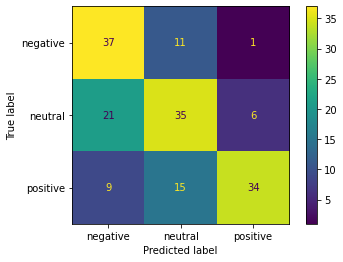

In [50]:
id3_score = accuracy_score(yva_test, id3_preds)
print(id3_score)
id3_matrix = plot_confusion_matrix(id3, xva_test, yva_test)
print(id3_matrix)
id3_report = classification_report(yva_test, id3_preds)
print(id3_report)

### Random Forest Classifier 

In [51]:
rfc = RandomForestClassifier(n_estimators=250, criterion='gini')

In [52]:
rfc.fit(xva_train, yva_train)

RandomForestClassifier(n_estimators=250)

In [53]:
rfc_preds = rfc.predict(xva_test)

0.6568047337278107
              precision    recall  f1-score   support

    negative       0.60      0.73      0.66        49
     neutral       0.60      0.66      0.63        62
    positive       0.83      0.59      0.69        58

    accuracy                           0.66       169
   macro avg       0.68      0.66      0.66       169
weighted avg       0.68      0.66      0.66       169



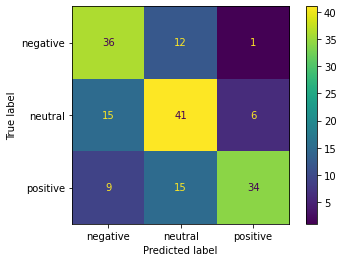

In [54]:
rfc_score = accuracy_score(yva_test, rfc_preds)
print(rfc_score)
rfc_matrix = plot_confusion_matrix(rfc, xva_test, yva_test)
print(rfc_matrix)
rfc_report = classification_report(yva_test, rfc_preds)
print(rfc_report)

### Naive Bayes 

In [55]:
nbva = MultinomialNB()

In [56]:
nbva.fit(xva_train, yva_train)

MultinomialNB()

In [57]:
nbva_preds = nbva.predict(xva_test)

0.6331360946745562
              precision    recall  f1-score   support

    negative       0.53      0.80      0.63        49
     neutral       0.68      0.45      0.54        62
    positive       0.74      0.69      0.71        58

    accuracy                           0.63       169
   macro avg       0.65      0.65      0.63       169
weighted avg       0.66      0.63      0.63       169



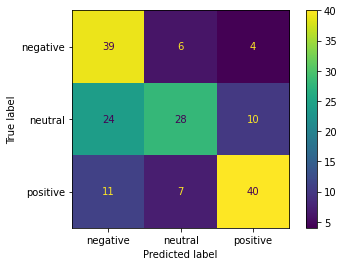

In [58]:
nbva_score = accuracy_score(yva_test, nbva_preds)
print(nbva_score)
nbva_matrix = plot_confusion_matrix(nbva, xva_test, yva_test)
print(nbva_matrix)
nbva_report = classification_report(yva_test, nbva_preds)
print(nbva_report)

### Decision Tree 

In [59]:
dtva = DecisionTreeClassifier()

In [60]:
dtva.fit(xva_train, yva_train)

DecisionTreeClassifier()

In [61]:
dtva_preds = dtva.predict(xva_test)

0.5207100591715976
              precision    recall  f1-score   support

    negative       0.42      0.51      0.46        49
     neutral       0.50      0.53      0.52        62
    positive       0.70      0.52      0.59        58

    accuracy                           0.52       169
   macro avg       0.54      0.52      0.52       169
weighted avg       0.54      0.52      0.53       169



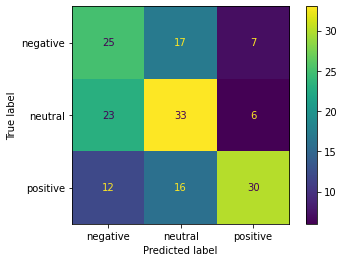

In [62]:
dtva_score = accuracy_score(yva_test, dtva_preds)
print(dtva_score)
dtva_matrix = plot_confusion_matrix(dtva, xva_test, yva_test)
print(dtva_matrix)
dtva_report = classification_report(yva_test, dtva_preds)
print(dtva_report)

### KNN Classifier

In [63]:
knnva = KNeighborsClassifier(n_neighbors=5, leaf_size=5, p=2)

In [64]:
knnva.fit(xva_train, yva_train)

KNeighborsClassifier(leaf_size=5)

In [65]:
knnva_preds = knnva.predict(xva_test)

0.41420118343195267
              precision    recall  f1-score   support

    negative       0.82      0.18      0.30        49
     neutral       0.57      0.06      0.12        62
    positive       0.38      0.98      0.55        58

    accuracy                           0.41       169
   macro avg       0.59      0.41      0.32       169
weighted avg       0.58      0.41      0.32       169



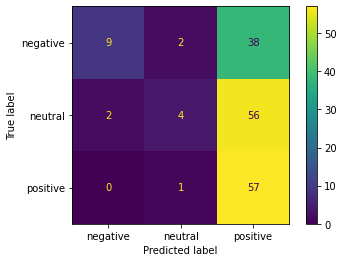

In [66]:
knnva_score = accuracy_score(yva_test, knnva_preds)
print(knnva_score)
knnva_matrix = plot_confusion_matrix(knnva, xva_test, yva_test)
print(knnva_matrix)
knnva_report = classification_report(yva_test, knnva_preds)
print(knnva_report)

# United

### Tfidf vectorization & splitting into train test

In [67]:
xu = united['text']

In [68]:
yu = united['airline_sentiment']

In [69]:
xu = tf.fit_transform(xu)

In [70]:
smc = SMOTETomek()

In [71]:
xu, yu = smc.fit_sample(xu,yu)

In [72]:
xu

<7899x5290 sparse matrix of type '<class 'numpy.float64'>'
	with 77050 stored elements in Compressed Sparse Row format>

In [73]:
xu_train, xu_test, yu_train, yu_test = train_test_split(xu, yu, test_size=0.34, random_state=101)

In [74]:
xu_train

<5213x5290 sparse matrix of type '<class 'numpy.float64'>'
	with 50698 stored elements in Compressed Sparse Row format>

### ID3 

In [75]:
id3u = RandomForestClassifier(n_estimators=250, criterion='entropy')

In [76]:
id3u.fit(xu_train, yu_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [77]:
id3u_preds = id3u.predict(xu_test)

0.8868205510052122
              precision    recall  f1-score   support

    negative       0.87      0.86      0.87       908
     neutral       0.89      0.86      0.87       919
    positive       0.90      0.94      0.92       859

    accuracy                           0.89      2686
   macro avg       0.89      0.89      0.89      2686
weighted avg       0.89      0.89      0.89      2686



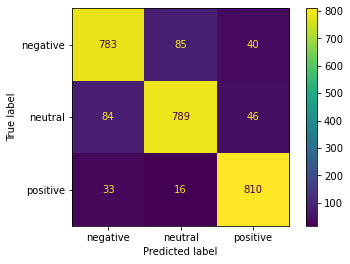

In [78]:
id3u_score = accuracy_score(yu_test, id3u_preds)
print(id3u_score)
id3u_matrix = plot_confusion_matrix(id3u, xu_test, yu_test)
print(id3u_matrix)
id3u_report = classification_report(yu_test, id3u_preds)
print(id3u_report)

### Random Forest Classifier 

In [79]:
rfcu = RandomForestClassifier(n_estimators=250, criterion='gini')

In [80]:
rfcu.fit(xu_train, yu_train)

RandomForestClassifier(n_estimators=250)

In [81]:
rfcu_preds = rfcu.predict(xu_test)

0.889054355919583
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86       908
     neutral       0.89      0.87      0.88       919
    positive       0.91      0.95      0.93       859

    accuracy                           0.89      2686
   macro avg       0.89      0.89      0.89      2686
weighted avg       0.89      0.89      0.89      2686



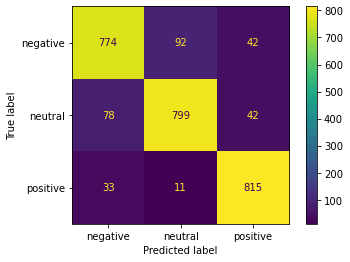

In [82]:
rfcu_score = accuracy_score(yu_test, rfcu_preds)
print(rfcu_score)
rfcu_matrix = plot_confusion_matrix(rfcu, xu_test, yu_test)
print(rfcu_matrix)
rfcu_report = classification_report(yu_test, rfcu_preds)
print(rfcu_report)

### Naive Bayes 

In [83]:
nbu = MultinomialNB()

In [84]:
nbu.fit(xu_train, yu_train)

MultinomialNB()

In [85]:
nbu_preds = nbu.predict(xu_test)

0.8384214445271779
              precision    recall  f1-score   support

    negative       0.86      0.77      0.81       908
     neutral       0.83      0.79      0.81       919
    positive       0.83      0.96      0.89       859

    accuracy                           0.84      2686
   macro avg       0.84      0.84      0.84      2686
weighted avg       0.84      0.84      0.84      2686



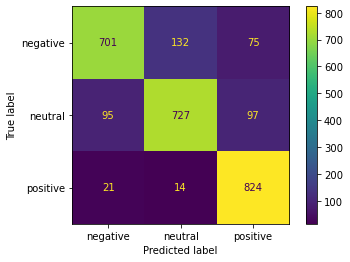

In [86]:
nbu_score = accuracy_score(yu_test, nbu_preds)
print(nbu_score)
nbu_matrix = plot_confusion_matrix(nbu, xu_test, yu_test)
print(nbu_matrix)
nbu_report = classification_report(yu_test, nbu_preds)
print(nbu_report)

### Decision Tree

In [87]:
dtu = DecisionTreeClassifier(max_depth=7)

In [88]:
dtu.fit(xu_train, yu_train)

DecisionTreeClassifier(max_depth=7)

In [89]:
dtu_preds = dtu.predict(xu_test)

0.6317944899478779
              precision    recall  f1-score   support

    negative       0.90      0.28      0.43       908
     neutral       0.50      0.87      0.63       919
    positive       0.81      0.75      0.78       859

    accuracy                           0.63      2686
   macro avg       0.74      0.63      0.61      2686
weighted avg       0.73      0.63      0.61      2686



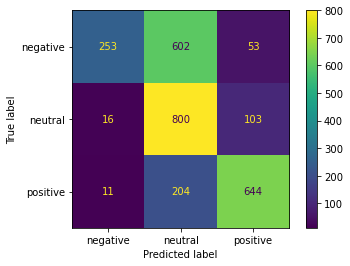

In [90]:
dtu_score = accuracy_score(yu_test, dtu_preds)
print(dtu_score)
dtu_matrix = plot_confusion_matrix(dtu, xu_test, yu_test)
print(dtu_matrix)
dtu_report = classification_report(yu_test, dtu_preds)
print(dtu_report)

### KNN Classifier 

In [91]:
knnu = KNeighborsClassifier(n_neighbors=5, leaf_size=5, p=2)

In [92]:
knnu.fit(xu_train, yu_train)

KNeighborsClassifier(leaf_size=5)

In [93]:
knnu_preds = knnu.predict(xu_test)

0.6094564408041697
              precision    recall  f1-score   support

    negative       0.44      0.08      0.13       908
     neutral       0.72      0.81      0.76       919
    positive       0.55      0.95      0.70       859

    accuracy                           0.61      2686
   macro avg       0.57      0.61      0.53      2686
weighted avg       0.57      0.61      0.53      2686



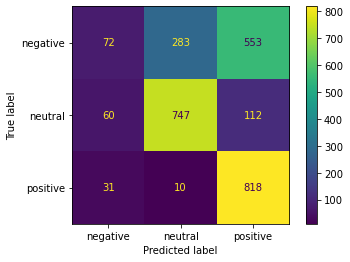

In [94]:
knnu_score = accuracy_score(yu_test, knnu_preds)
print(knnu_score)
knnu_matrix = plot_confusion_matrix(knnu, xu_test, yu_test)
print(knnu_matrix)
knnu_report = classification_report(yu_test, knnu_preds)
print(knnu_report)

### SVC

In [95]:
svcu = SVC(kernel ='poly', degree=2, gamma = 'scale', shrinking = True)

In [96]:
svcu.fit(xu_train, yu_train)

SVC(degree=2, kernel='poly')

In [97]:
svcu_preds = svcu.predict(xu_test)

0.9177215189873418
              precision    recall  f1-score   support

    negative       0.96      0.89      0.92       908
     neutral       0.85      0.94      0.89       919
    positive       0.95      0.93      0.94       859

    accuracy                           0.92      2686
   macro avg       0.92      0.92      0.92      2686
weighted avg       0.92      0.92      0.92      2686



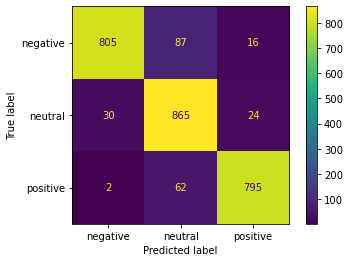

In [98]:
svcu_score = accuracy_score(yu_test, svcu_preds)
print(svcu_score)
svcu_matrix = plot_confusion_matrix(svcu, xu_test, yu_test)
print(svcu_matrix)
svcu_report = classification_report(yu_test, svcu_preds)
print(svcu_report)

### Passive Aggressive Classifier

In [99]:
pacu = PassiveAggressiveClassifier(max_iter=7)

In [100]:
pacu.fit(xu_train, yu_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


PassiveAggressiveClassifier(max_iter=7)

In [101]:
pacu_preds = pacu.predict(xu_test)

0.8864482501861504
              precision    recall  f1-score   support

    negative       0.96      0.76      0.85       908
     neutral       0.83      0.93      0.88       919
    positive       0.89      0.97      0.93       859

    accuracy                           0.89      2686
   macro avg       0.89      0.89      0.89      2686
weighted avg       0.89      0.89      0.88      2686



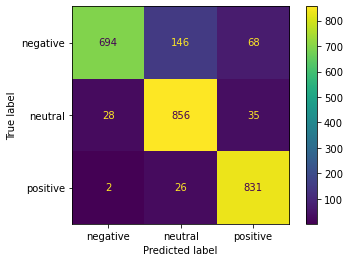

In [102]:
pacu_score = accuracy_score(yu_test, pacu_preds)
print(pacu_score)
pacu_matrix = plot_confusion_matrix(pacu, xu_test, yu_test)
print(pacu_matrix)
pacu_report = classification_report(yu_test, pacu_preds)
print(pacu_report)

### Logistic Regression Classifier CV

In [103]:
logu = LogisticRegressionCV()

In [104]:
logu.fit(xu_train, yu_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegressionCV()

In [105]:
logu_preds = logu.predict(xu_test)

0.887192851824274
              precision    recall  f1-score   support

    negative       0.95      0.76      0.84       908
     neutral       0.84      0.93      0.88       919
    positive       0.89      0.98      0.93       859

    accuracy                           0.89      2686
   macro avg       0.89      0.89      0.89      2686
weighted avg       0.89      0.89      0.89      2686



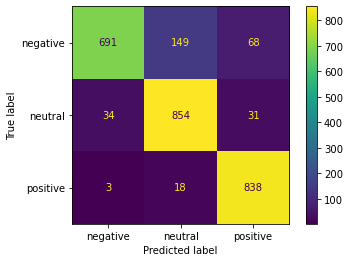

In [106]:
logu_score = accuracy_score(yu_test, logu_preds)
print(logu_score)
logu_matrix = plot_confusion_matrix(logu, xu_test, yu_test)
print(logu_matrix)
logu_report = classification_report(yu_test, logu_preds)
print(logu_report)

# Southwest

### Tfidf vectorization & splitting into train test

In [107]:
xs = southwest['text']

In [108]:
ys = southwest['airline_sentiment']

In [109]:
xs = tf.fit_transform(xs)

In [110]:
xs, ys = smc.fit_sample(xs,ys)

In [111]:
xs

<3534x3892 sparse matrix of type '<class 'numpy.float64'>'
	with 36461 stored elements in Compressed Sparse Row format>

In [112]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.34, random_state=101)

In [113]:
xs_train

<2332x3892 sparse matrix of type '<class 'numpy.float64'>'
	with 23934 stored elements in Compressed Sparse Row format>

### ID3 

In [114]:
id3s = RandomForestClassifier(n_estimators=250, criterion='gini')

In [115]:
id3s.fit(xs_train, ys_train)

RandomForestClassifier(n_estimators=250)

In [116]:
id3s_preds = id3s.predict(xs_test)

0.8161397670549085
              precision    recall  f1-score   support

    negative       0.76      0.85      0.80       396
     neutral       0.78      0.75      0.77       384
    positive       0.91      0.85      0.88       422

    accuracy                           0.82      1202
   macro avg       0.82      0.81      0.81      1202
weighted avg       0.82      0.82      0.82      1202



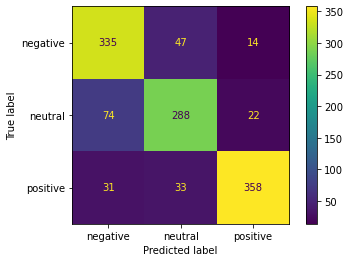

In [117]:
id3s_score = accuracy_score(ys_test, id3s_preds)
print(id3s_score)
id3s_matrix = plot_confusion_matrix(id3s, xs_test, ys_test)
print(id3s_matrix)
id3s_report = classification_report(ys_test, id3s_preds)
print(id3s_report)

### Random Forest Classifier

In [118]:
rfcs = RandomForestClassifier(n_estimators=250, criterion='entropy')

In [119]:
rfcs.fit(xs_train, ys_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [120]:
rfcs_preds = rfcs.predict(xs_test)

0.8094841930116472
              precision    recall  f1-score   support

    negative       0.75      0.84      0.79       396
     neutral       0.77      0.74      0.76       384
    positive       0.91      0.84      0.88       422

    accuracy                           0.81      1202
   macro avg       0.81      0.81      0.81      1202
weighted avg       0.81      0.81      0.81      1202



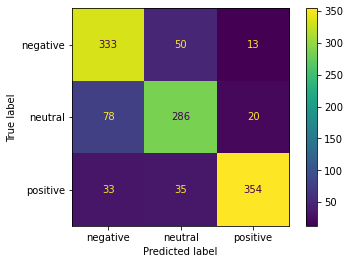

In [121]:
rfcs_score = accuracy_score(ys_test, rfcs_preds)
print(rfcs_score)
rfcs_matrix = plot_confusion_matrix(rfcs, xs_test, ys_test)
print(rfcs_matrix)
rfcs_report = classification_report(ys_test, rfcs_preds)
print(rfcs_report)

### Naive Bayes

In [122]:
nbs = MultinomialNB()

In [123]:
nbs.fit(xs_train, ys_train)

MultinomialNB()

In [124]:
nbs_preds = nbs.predict(xs_test)

0.8044925124792013
              precision    recall  f1-score   support

    negative       0.78      0.83      0.80       396
     neutral       0.77      0.73      0.75       384
    positive       0.86      0.85      0.85       422

    accuracy                           0.80      1202
   macro avg       0.80      0.80      0.80      1202
weighted avg       0.80      0.80      0.80      1202



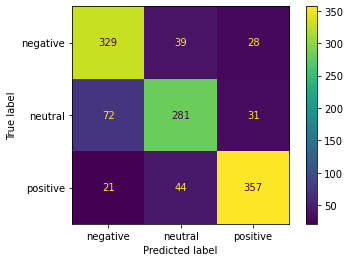

In [125]:
nbs_score = accuracy_score(ys_test, nbs_preds)
print(nbs_score)
nbs_matrix = plot_confusion_matrix(nbs, xs_test, ys_test)
print(nbs_matrix)
nbs_report = classification_report(ys_test, nbs_preds)
print(nbs_report)

### Decision Tree 

In [126]:
dts = DecisionTreeClassifier()

In [127]:
dts.fit(xs_train, ys_train)

DecisionTreeClassifier()

In [128]:
dts_preds = dts.predict(xs_test)

0.7287853577371048
              precision    recall  f1-score   support

    negative       0.69      0.72      0.70       396
     neutral       0.67      0.65      0.66       384
    positive       0.82      0.81      0.81       422

    accuracy                           0.73      1202
   macro avg       0.73      0.73      0.73      1202
weighted avg       0.73      0.73      0.73      1202



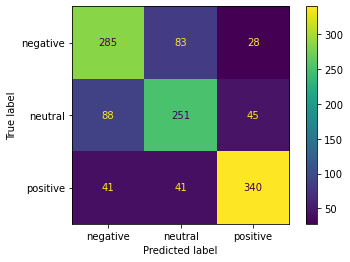

In [129]:
dts_score = accuracy_score(ys_test, dts_preds)
print(dts_score)
dts_matrix = plot_confusion_matrix(dts, xs_test, ys_test)
print(dts_matrix)
dts_report = classification_report(ys_test, dts_preds)
print(dts_report)

### KNN Classifier 

In [130]:
knns = KNeighborsClassifier(n_neighbors=5, leaf_size=5, p=2)

In [131]:
knns.fit(xs_train, ys_train)

KNeighborsClassifier(leaf_size=5)

In [132]:
knns_preds = knns.predict(xs_test)

0.608153078202995
              precision    recall  f1-score   support

    negative       0.94      0.12      0.22       396
     neutral       0.51      0.82      0.63       384
    positive       0.68      0.87      0.77       422

    accuracy                           0.61      1202
   macro avg       0.71      0.60      0.54      1202
weighted avg       0.71      0.61      0.54      1202



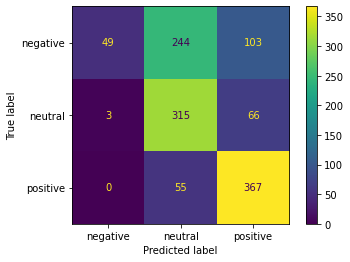

In [133]:
knns_score = accuracy_score(ys_test, knns_preds)
print(knns_score)
knns_matrix = plot_confusion_matrix(knns, xs_test, ys_test)
print(knns_matrix)
knns_report = classification_report(ys_test, knns_preds)
print(knns_report)

### SVC

In [134]:
svcs = SVC(kernel ='poly',degree=2,gamma = 'scale', shrinking = True)

In [135]:
svcs.fit(xs_train, ys_train)

SVC(degree=2, kernel='poly')

In [136]:
svcs_preds = svcs.predict(xs_test)

0.8519134775374376
              precision    recall  f1-score   support

    negative       0.78      0.91      0.84       396
     neutral       0.84      0.82      0.83       384
    positive       0.96      0.83      0.89       422

    accuracy                           0.85      1202
   macro avg       0.86      0.85      0.85      1202
weighted avg       0.86      0.85      0.85      1202



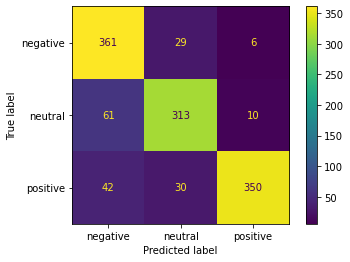

In [137]:
svcs_score = accuracy_score(ys_test, svcs_preds)
print(svcs_score)
svcs_matrix = plot_confusion_matrix(svcs, xs_test, ys_test)
print(svcs_matrix)
svcs_report = classification_report(ys_test, svcs_preds)
print(svcs_report)

### Passive Aggressive Classifier

In [138]:
pacs = PassiveAggressiveClassifier(max_iter=7)

In [139]:
pacs.fit(xs_train, ys_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


PassiveAggressiveClassifier(max_iter=7)

In [140]:
pacs_preds = pacs.predict(xs_test)

0.8336106489184693
              precision    recall  f1-score   support

    negative       0.85      0.79      0.82       396
     neutral       0.76      0.84      0.79       384
    positive       0.90      0.87      0.89       422

    accuracy                           0.83      1202
   macro avg       0.84      0.83      0.83      1202
weighted avg       0.84      0.83      0.83      1202



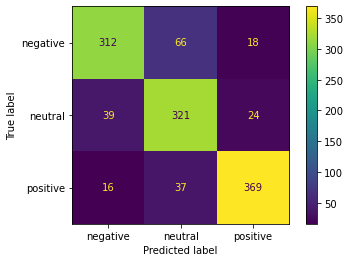

In [141]:
pacs_score = accuracy_score(ys_test, pacs_preds)
print(pacs_score)
pacs_matrix = plot_confusion_matrix(pacs, xs_test, ys_test)
print(pacs_matrix)
pacs_report = classification_report(ys_test, pacs_preds)
print(pacs_report)

### Logistic Regression Classifier CV

In [142]:
logs = LogisticRegressionCV()

In [143]:
logs.fit(xs_train, ys_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegressionCV()

In [144]:
logs_preds = logs.predict(xs_test)

0.8194675540765392
              precision    recall  f1-score   support

    negative       0.80      0.82      0.81       396
     neutral       0.76      0.78      0.77       384
    positive       0.90      0.85      0.87       422

    accuracy                           0.82      1202
   macro avg       0.82      0.82      0.82      1202
weighted avg       0.82      0.82      0.82      1202



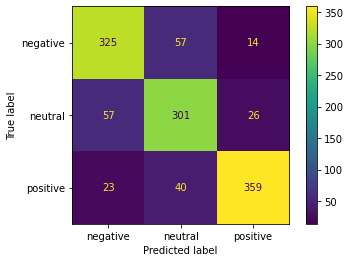

In [145]:
logs_score = accuracy_score(ys_test, logs_preds)
print(logs_score)
logs_matrix = plot_confusion_matrix(logs, xs_test, ys_test)
print(logs_matrix)
logs_report = classification_report(ys_test, logs_preds)
print(logs_report)

# Delta

### Tfidf vectorization & splitting into train test

In [146]:
xd = delta['text']

In [147]:
yd = delta['airline_sentiment']

In [148]:
xd = tf.fit_transform(xd)

In [149]:
xd, yd = smc.fit_sample(xd,yd)

In [150]:
xd

<2805x3980 sparse matrix of type '<class 'numpy.float64'>'
	with 27028 stored elements in Compressed Sparse Row format>

In [151]:
xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd, test_size=0.34, random_state=101)

In [152]:
xd_train

<1851x3980 sparse matrix of type '<class 'numpy.float64'>'
	with 17938 stored elements in Compressed Sparse Row format>

### ID3 

In [153]:
id3d = RandomForestClassifier(n_estimators=250, criterion='entropy')

In [154]:
id3d.fit(xd_train, yd_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [155]:
id3d_preds = id3d.predict(xd_test)

0.7515723270440252
              precision    recall  f1-score   support

    negative       0.73      0.73      0.73       328
     neutral       0.67      0.76      0.71       316
    positive       0.87      0.77      0.82       310

    accuracy                           0.75       954
   macro avg       0.76      0.75      0.75       954
weighted avg       0.76      0.75      0.75       954



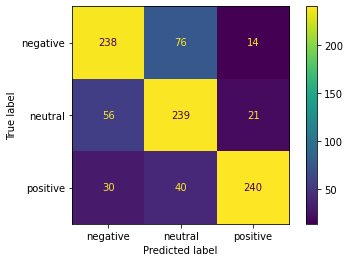

In [156]:
id3d_score = accuracy_score(yd_test, id3d_preds)
print(id3d_score)
id3d_matrix = plot_confusion_matrix(id3d, xd_test, yd_test)
print(id3d_matrix)
id3d_report = classification_report(yd_test, id3d_preds)
print(id3d_report)

### Random Forest Classifier

In [157]:
rfcd = RandomForestClassifier(n_estimators=250, criterion='gini')

In [158]:
rfcd.fit(xd_train, yd_train)

RandomForestClassifier(n_estimators=250)

In [159]:
rfcd_preds = rfcd.predict(xd_test)

0.7515723270440252
              precision    recall  f1-score   support

    negative       0.74      0.72      0.73       328
     neutral       0.67      0.76      0.71       316
    positive       0.87      0.78      0.82       310

    accuracy                           0.75       954
   macro avg       0.76      0.75      0.75       954
weighted avg       0.76      0.75      0.75       954



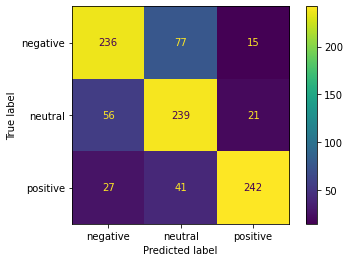

In [160]:
rfcd_score = accuracy_score(yd_test, rfcd_preds)
print(rfcd_score)
rfcd_matrix = plot_confusion_matrix(rfcd, xd_test, yd_test)
print(rfcd_matrix)
rfcd_report = classification_report(yd_test, rfcd_preds)
print(rfcd_report)

### Naive Bayes 

In [161]:
nbd = MultinomialNB()

In [162]:
nbd.fit(xd_train, yd_train)

MultinomialNB()

In [163]:
nbd_preds = nbd.predict(xd_test)

0.7641509433962265
              precision    recall  f1-score   support

    negative       0.75      0.76      0.75       328
     neutral       0.77      0.64      0.70       316
    positive       0.77      0.90      0.83       310

    accuracy                           0.76       954
   macro avg       0.76      0.77      0.76       954
weighted avg       0.76      0.76      0.76       954



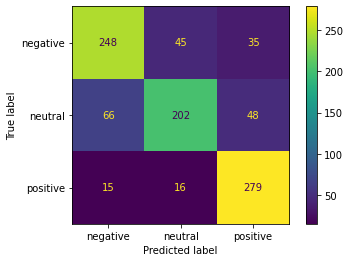

In [164]:
nbd_score = accuracy_score(yd_test, nbd_preds)
print(nbd_score)
nbd_matrix = plot_confusion_matrix(nbd, xd_test, yd_test)
print(nbd_matrix)
nbd_report = classification_report(yd_test, nbd_preds)
print(nbd_report)

### Decision Tree 

In [165]:
dtd = DecisionTreeClassifier()

In [166]:
dtd.fit(xd_train, yd_train)

DecisionTreeClassifier()

In [167]:
dtd_preds = dtd.predict(xd_test)

0.6593291404612159
              precision    recall  f1-score   support

    negative       0.65      0.60      0.63       328
     neutral       0.60      0.67      0.63       316
    positive       0.73      0.71      0.72       310

    accuracy                           0.66       954
   macro avg       0.66      0.66      0.66       954
weighted avg       0.66      0.66      0.66       954



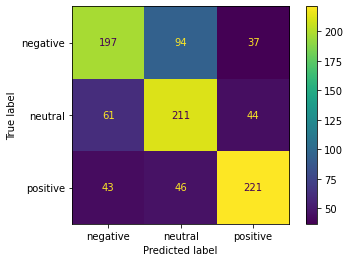

In [168]:
dtd_score = accuracy_score(yd_test, dtd_preds)
print(dtd_score)
dtd_matrix = plot_confusion_matrix(dtd, xd_test, yd_test)
print(dtd_matrix)
dtd_report = classification_report(yd_test, dtd_preds)
print(dtd_report)

### KNN Classifier 

In [169]:
knnd = KNeighborsClassifier(n_neighbors=5, leaf_size=5, p=2)

In [170]:
knnd.fit(xd_train, yd_train)

KNeighborsClassifier(leaf_size=5)

In [171]:
knnd_preds = knnd.predict(xd_test)

0.5555555555555556
              precision    recall  f1-score   support

    negative       0.76      0.09      0.17       328
     neutral       0.50      0.69      0.58       316
    positive       0.59      0.91      0.71       310

    accuracy                           0.56       954
   macro avg       0.61      0.56      0.49       954
weighted avg       0.62      0.56      0.48       954



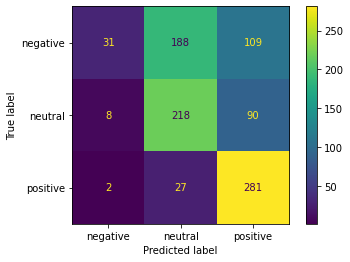

In [172]:
knnd_score = accuracy_score(yd_test, knnd_preds)
print(knnd_score)
knnd_matrix = plot_confusion_matrix(knnd, xd_test, yd_test)
print(knnd_matrix)
knnd_report = classification_report(yd_test, knnd_preds)
print(knnd_report)

### SVC

In [173]:
svcd = SVC(kernel ='poly',degree=2,gamma = 'scale', shrinking = True)

In [174]:
svcd.fit(xd_train, yd_train)

SVC(degree=2, kernel='poly')

In [175]:
svcd_preds = svcd.predict(xd_test)

0.8144654088050315
              precision    recall  f1-score   support

    negative       0.75      0.85      0.79       328
     neutral       0.79      0.74      0.76       316
    positive       0.94      0.85      0.89       310

    accuracy                           0.81       954
   macro avg       0.82      0.81      0.82       954
weighted avg       0.82      0.81      0.82       954



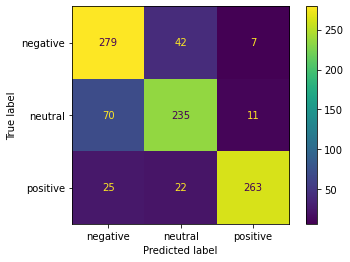

In [176]:
svcd_score = accuracy_score(yd_test, svcd_preds)
print(svcd_score)
svcd_matrix = plot_confusion_matrix(svcd, xd_test, yd_test)
print(svcd_matrix)
svcd_report = classification_report(yd_test, svcd_preds)
print(svcd_report)

# US Airways

### Tfidf vectorization & splitting into train test

In [177]:
xua = us_airways['text']

In [178]:
yua = us_airways['airline_sentiment']

In [179]:
xua = tf.fit_transform(xua)

In [180]:
xua, yua = smc.fit_sample(xua,yua)

In [181]:
xua

<6787x4116 sparse matrix of type '<class 'numpy.float64'>'
	with 78279 stored elements in Compressed Sparse Row format>

In [182]:
xua_train, xua_test, yua_train, yua_test = train_test_split(xua, yua, test_size=0.34, random_state=101)

In [183]:
xua_train

<4479x4116 sparse matrix of type '<class 'numpy.float64'>'
	with 51200 stored elements in Compressed Sparse Row format>

### ID3 

In [184]:
id3ua = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=42)

In [185]:
id3ua.fit(xua_train, yua_train)

RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=42)

In [186]:
id3ua_preds = id3ua.predict(xua_test)

0.9432409012131716
              precision    recall  f1-score   support

    negative       0.89      0.96      0.92       753
     neutral       0.97      0.91      0.94       794
    positive       0.97      0.96      0.97       761

    accuracy                           0.94      2308
   macro avg       0.94      0.94      0.94      2308
weighted avg       0.95      0.94      0.94      2308



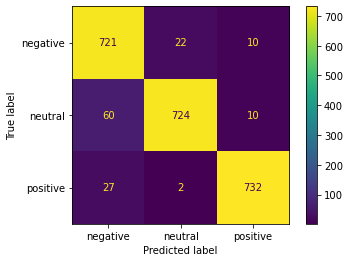

In [187]:
id3ua_score = accuracy_score(yua_test, id3ua_preds)
print(id3ua_score)
id3ua_matrix = plot_confusion_matrix(id3ua, xua_test, yua_test)
print(id3ua_matrix)
id3ua_report = classification_report(yua_test, id3ua_preds)
print(id3ua_report)

### Random Forest Classifier

In [188]:
rfcua = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth = 5)

In [189]:
rfcua.fit(xua_train, yua_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=250)

In [190]:
rfcua_preds = rfcua.predict(xua_test)

0.8067590987868284
              precision    recall  f1-score   support

    negative       0.76      0.84      0.79       753
     neutral       0.84      0.66      0.74       794
    positive       0.83      0.93      0.88       761

    accuracy                           0.81      2308
   macro avg       0.81      0.81      0.80      2308
weighted avg       0.81      0.81      0.80      2308



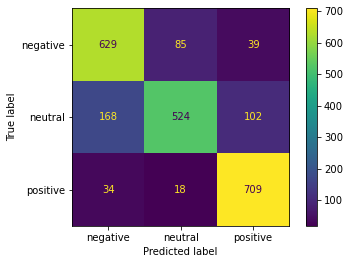

In [191]:
rfcua_score = accuracy_score(yua_test, rfcua_preds)
print(rfcua_score)
rfcua_matrix = plot_confusion_matrix(rfcua, xua_test, yua_test)
print(rfcua_matrix)
rfcua_report = classification_report(yua_test, rfcua_preds)
print(rfcua_report)

### Naive Bayes not nice 

In [192]:
nbua = MultinomialNB()

In [193]:
nbua.fit(xua_train, yua_train)

MultinomialNB()

In [194]:
nbua_preds = nbua.predict(xua_test)

0.8873483535528596
              precision    recall  f1-score   support

    negative       0.92      0.80      0.86       753
     neutral       0.86      0.88      0.87       794
    positive       0.89      0.98      0.93       761

    accuracy                           0.89      2308
   macro avg       0.89      0.89      0.89      2308
weighted avg       0.89      0.89      0.89      2308



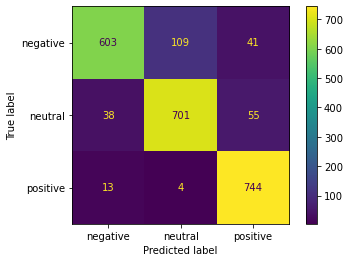

In [195]:
nbua_score = accuracy_score(yua_test, nbua_preds)
print(nbua_score)
nbua_matrix = plot_confusion_matrix(nbua, xua_test, yua_test)
print(nbua_matrix)
nbua_report = classification_report(yua_test, nbua_preds)
print(nbua_report)

### Decision Tree

In [196]:
dtua = DecisionTreeClassifier()

In [197]:
dtua.fit(xua_train, yua_train)

DecisionTreeClassifier()

In [198]:
dtua_preds = dtua.predict(xua_test)

0.8669844020797227
              precision    recall  f1-score   support

    negative       0.82      0.83      0.82       753
     neutral       0.86      0.85      0.85       794
    positive       0.92      0.93      0.92       761

    accuracy                           0.87      2308
   macro avg       0.87      0.87      0.87      2308
weighted avg       0.87      0.87      0.87      2308



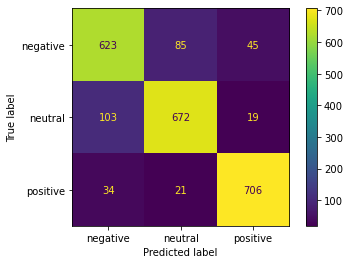

In [199]:
dtua_score = accuracy_score(yua_test, dtua_preds)
print(dtua_score)
dtua_matrix = plot_confusion_matrix(dtua, xua_test, yua_test)
print(dtua_matrix)
dtua_report = classification_report(yua_test, dtua_preds)
print(dtua_report)

### KNN Classifier 

In [200]:
knnua = KNeighborsClassifier(n_neighbors=5, leaf_size=5, p=2)

In [201]:
knnua.fit(xua_train, yua_train)

KNeighborsClassifier(leaf_size=5)

In [202]:
knnua_preds = knnua.predict(xua_test)

0.6845753899480069
              precision    recall  f1-score   support

    negative       0.91      0.08      0.15       753
     neutral       0.62      0.97      0.75       794
    positive       0.76      0.99      0.86       761

    accuracy                           0.68      2308
   macro avg       0.76      0.68      0.59      2308
weighted avg       0.76      0.68      0.59      2308



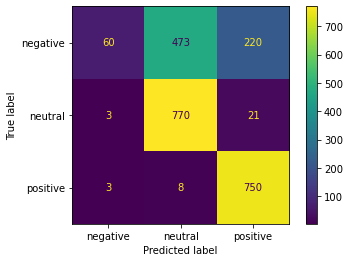

In [203]:
knnua_score = accuracy_score(yua_test, knnua_preds)
print(knnua_score)
knnua_matrix = plot_confusion_matrix(knnua, xua_test, yua_test)
print(knnua_matrix)
knnua_report = classification_report(yua_test, knnua_preds)
print(knnua_report)

### SVC

In [204]:
svcua = SVC(kernel ='poly',degree=2, gamma = 'scale', shrinking = True)

In [205]:
svcua.fit(xua_train, yua_train)

SVC(degree=2, kernel='poly')

In [206]:
svcua_preds = svcua.predict(xua_test)

0.9770363951473137
              precision    recall  f1-score   support

    negative       0.99      0.97      0.98       753
     neutral       0.97      0.97      0.97       794
    positive       0.97      1.00      0.98       761

    accuracy                           0.98      2308
   macro avg       0.98      0.98      0.98      2308
weighted avg       0.98      0.98      0.98      2308



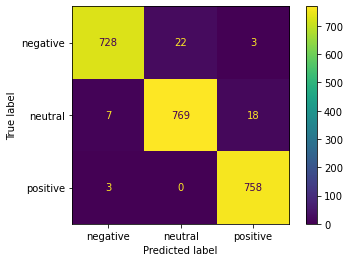

In [207]:
svcua_score = accuracy_score(yua_test, svcua_preds)
print(svcua_score)
svcua_matrix = plot_confusion_matrix(svcua, xua_test, yua_test)
print(svcua_matrix)
svcua_report = classification_report(yua_test, svcua_preds)
print(svcua_report)

# American

### Tfidf vectorization & splitting into train test

In [208]:
xa = american['text']

In [209]:
ya = american['airline_sentiment']

In [210]:
xa = tf.fit_transform(xa)

In [211]:
xa, ya = smc.fit_sample(xa,ya)

In [212]:
xa

<5880x3931 sparse matrix of type '<class 'numpy.float64'>'
	with 62544 stored elements in Compressed Sparse Row format>

In [213]:
xa_train, xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.34, random_state=101)


In [214]:
xa_train

<3880x3931 sparse matrix of type '<class 'numpy.float64'>'
	with 41186 stored elements in Compressed Sparse Row format>

### ID3 

In [215]:
id3a = RandomForestClassifier(n_estimators=250, criterion='entropy')

In [216]:
id3a.fit(xa_train, ya_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [217]:
id3a_preds = id3a.predict(xa_test)

0.6272189349112426
              precision    recall  f1-score   support

    negative       0.89      0.94      0.91       662
     neutral       0.94      0.90      0.92       662
    positive       0.96      0.95      0.95       676

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



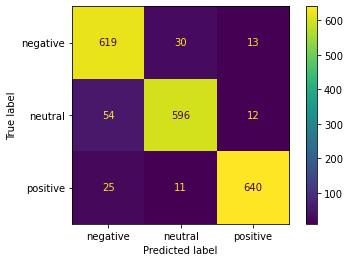

In [218]:
id3a_score = accuracy_score(ya_test, id3a_preds)
print(id3_score)
id3a_matrix = plot_confusion_matrix(id3a, xa_test, ya_test)
print(id3a_matrix)
id3a_report = classification_report(ya_test, id3a_preds)
print(id3a_report)

### Random Forest Classifier 

In [219]:
rfca = RandomForestClassifier(n_estimators=250, criterion='gini')

In [220]:
rfca.fit(xa_train, ya_train)

RandomForestClassifier(n_estimators=250)

In [221]:
rfca_preds = rfca.predict(xa_test)

0.93
              precision    recall  f1-score   support

    negative       0.89      0.94      0.92       662
     neutral       0.93      0.90      0.92       662
    positive       0.97      0.95      0.96       676

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



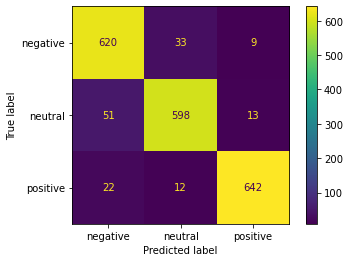

In [222]:
rfca_score = accuracy_score(ya_test, rfca_preds)
print(rfca_score)
rfca_matrix = plot_confusion_matrix(rfca, xa_test, ya_test)
print(rfca_matrix)
rfca_report = classification_report(ya_test, rfca_preds)
print(rfca_report)

### Naive Bayes 

In [223]:
nba = MultinomialNB()

In [224]:
nba.fit(xa_train, ya_train)

MultinomialNB()

In [225]:
nba_preds = nba.predict(xa_test)

0.8875
              precision    recall  f1-score   support

    negative       0.92      0.82      0.87       662
     neutral       0.86      0.87      0.87       662
    positive       0.89      0.97      0.93       676

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



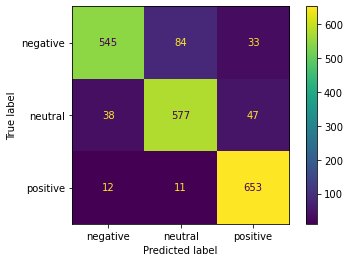

In [226]:
nba_score = accuracy_score(ya_test, nba_preds)
print(nba_score)
nba_matrix = plot_confusion_matrix(nba, xa_test, ya_test)
print(nba_matrix)
nba_report = classification_report(ya_test, nba_preds)
print(nba_report)

### Decision Tree Classifier 

In [227]:
dta = DecisionTreeClassifier()

In [228]:
dta.fit(xa_train, ya_train)

DecisionTreeClassifier()

In [229]:
dta_preds = dta.predict(xa_test)

0.859
              precision    recall  f1-score   support

    negative       0.84      0.81      0.82       662
     neutral       0.83      0.86      0.84       662
    positive       0.91      0.91      0.91       676

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



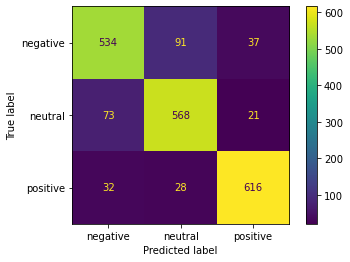

In [230]:
dta_score = accuracy_score(ya_test, dta_preds)
print(dta_score)
dta_matrix = plot_confusion_matrix(dta, xa_test, ya_test)
print(dta_matrix)
dta_report = classification_report(ya_test, dta_preds)
print(dta_report)

### KNN Classifier

In [231]:
knna = KNeighborsClassifier(n_neighbors=5, leaf_size=5, p=2)

In [232]:
knna.fit(xa_train, ya_train)

KNeighborsClassifier(leaf_size=5)

In [233]:
knna_preds = knna.predict(xa_test)

0.67
              precision    recall  f1-score   support

    negative       1.00      0.08      0.14       662
     neutral       0.60      0.96      0.73       662
    positive       0.74      0.97      0.84       676

    accuracy                           0.67      2000
   macro avg       0.78      0.67      0.57      2000
weighted avg       0.78      0.67      0.57      2000



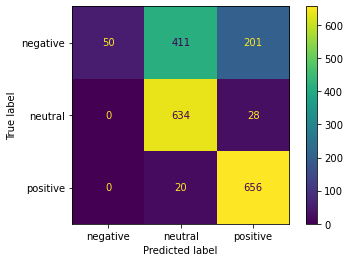

In [234]:
knna_score = accuracy_score(ya_test, knna_preds)
print(knna_score)
knna_matrix = plot_confusion_matrix(knna, xa_test, ya_test)
print(knna_matrix)
knna_report = classification_report(ya_test, knna_preds)
print(knna_report)

### SVC

In [235]:
svca = SVC(kernel ='poly',degree=2, gamma = 'scale', shrinking = True)

In [236]:
svca.fit(xa_train,ya_train)

SVC(degree=2, kernel='poly')

In [237]:
svca_preds = svca.predict(xa_test)

0.9595
              precision    recall  f1-score   support

    negative       0.95      0.96      0.96       662
     neutral       0.96      0.94      0.95       662
    positive       0.97      0.98      0.97       676

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



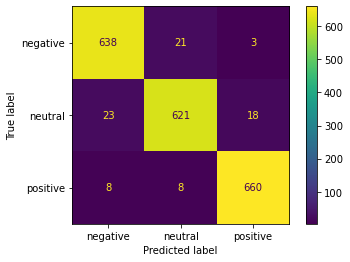

In [238]:
svca_score = accuracy_score(ya_test, svca_preds)
print(svca_score)
svca_matrix = plot_confusion_matrix(svca, xa_test, ya_test)
print(svca_matrix)
svca_report = classification_report(ya_test, svca_preds)
print(svca_report)